In [1]:
import pandas as pd
import numpy as np
from keras import Sequential
from keras.layers import SimpleRNN, Dense, LSTM
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/Users/LaurensKrook/Documents/Universiteit van Amsterdam; Kunstmatige Intelligentie/Jaar 2/Semester 1/Leren en Beslissen/General/Data/Houses/Houses58-75/House64-1m.csv")
df['timestamp'] = pd.to_datetime(df.timestamp, format='%Y-%m-%d %H:%M:%S')
df['Date'] = df['timestamp'].dt.date
df["Date"] = df['Date'].astype(str)
df = df.set_index('Date')
df = df.loc['2019-04-01':'2019-04-08']
df

,timestamp,house,EXPORT_KW,IMPORT_KW,PV_KW,TOTAL_KW,UNC_KW
Date,,,,,,,
2019-04-01,2019-04-01 00:00:00+02:00,House64,0.0,0.24,0.0,0.24,0.24
2019-04-01,2019-04-01 00:01:00+02:00,House64,0.0,0.30,0.0,0.30,0.30
2019-04-01,2019-04-01 00:02:00+02:00,House64,0.0,0.24,0.0,0.24,0.24
2019-04-01,2019-04-01 00:03:00+02:00,House64,0.0,0.24,0.0,0.24,0.24
2019-04-01,2019-04-01 00:04:00+02:00,House64,0.0,0.30,0.0,0.30,0.30
...,...,...,...,...,...,...,...
2019-04-08,2019-04-08 23:55:00+02:00,House64,0.0,0.30,0.0,0.30,0.30
2019-04-08,2019-04-08 23:56:00+02:00,House64,0.0,0.30,0.0,0.30,0.30
2019-04-08,2019-04-08 23:57:00+02:00,House64,0.0,0.24,0.0,0.24,0.24


**IMPORT_KW**

In [3]:
import_kw = df['IMPORT_KW']
train_test_balance = len(df)//2
train = list(import_kw)[:train_test_balance]
test = list(import_kw)[train_test_balance:]

In [4]:
print(len(train))
print(len(test))

5760
5760


**Training**

In [5]:
windowSize, X_train, y_train = 100, [], []
for index in range(len(train)-windowSize):
    X_train.append(train[index:index+windowSize])
    y_train.append(train[index+windowSize])

In [6]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = X_train.reshape((len(X_train), 100,1))

**Model**

In [7]:
model = Sequential()
model.add(SimpleRNN(10, input_shape=(100,1)))
model.add(Dense(1, activation='linear'))

In [8]:
model.compile(loss='mse', optimizer='Adam', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
177/177 [==============================] - 4s 17ms/step - loss: 0.0581 - mae: 0.1078
Epoch 2/5
177/177 [==============================] - 3s 17ms/step - loss: 0.0376 - mae: 0.0811
Epoch 3/5
177/177 [==============================] - 3s 17ms/step - loss: 0.0334 - mae: 0.0738
Epoch 4/5
177/177 [==============================] - 4s 23ms/step - loss: 0.0319 - mae: 0.0711
Epoch 5/5
177/177 [==============================] - 3s 19ms/step - loss: 0.0312 - mae: 0.0697


In [9]:
model = Sequential()
model.add(SimpleRNN(64, input_shape=(100,1), return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(16))
model.add(Dense(8, activation='tanh'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='Adam', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
177/177 [==============================] - 15s 65ms/step - loss: 0.0763 - mae: 0.1273
Epoch 2/5
165/177 [==========================>...] - ETA: 0s - loss: 0.0391 - mae: 0.0884

KeyboardInterrupt: 

In [ ]:
y_pred_model = model.predict(X_train)

In [ ]:
rmse_train = sqrt(mean_squared_error(y_train, y_pred_model))
print(rmse_train)

0.17323784830436054


**Test**

In [ ]:
windowSize, X_test, y_test = 100, [], []
for index in range(len(test)-windowSize):
    X_test.append(test[index:index+windowSize])
    y_test.append(test[index+windowSize])

In [ ]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = X_test.reshape((len(X_test), 100,1))

In [ ]:
y_test_pred_model = model.predict(X_test)

In [ ]:
rmse_test = sqrt(mean_squared_error(y_test, y_test_pred_model))
print(rmse_test)

0.22555674496728093


**Plot**

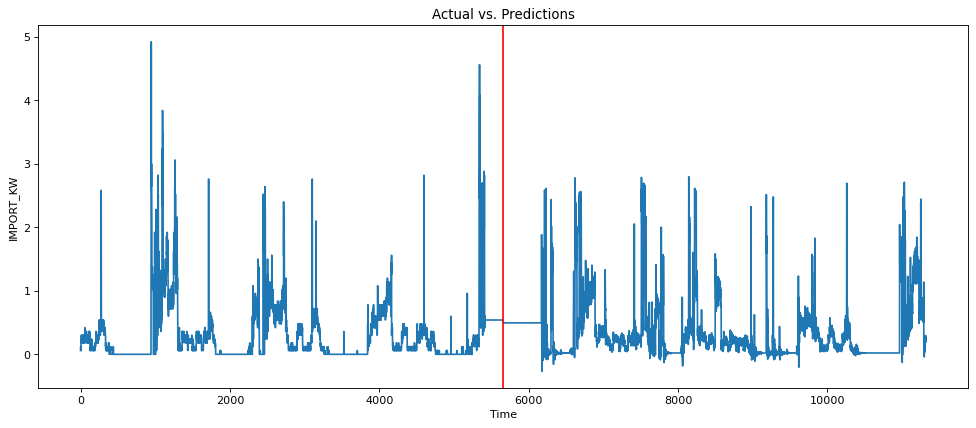

In [ ]:
def plot_result(y_train, y_test, y_pred_model, y_test_pred_model):
    result = np.append(y_train, y_test_pred_model)
#     predictions = np.append(y_pred_model, y_test_pred_model)
    rows = len(result)
    plt.figure(figsize=(15,6), dpi=80)
    plt.plot(range(rows), result)
#     plt.plot(range(rows), y_test_pred_model)
    plt.axvline(x=len(y_train), color='r')
#     plt.legend(['Actual', 'Prediction'])
    plt.xlabel('Time')
    plt.ylabel('IMPORT_KW')
    plt.title('Actual vs. Predictions')

plot_result(y_train, y_test, y_pred_model, y_test_pred_model)

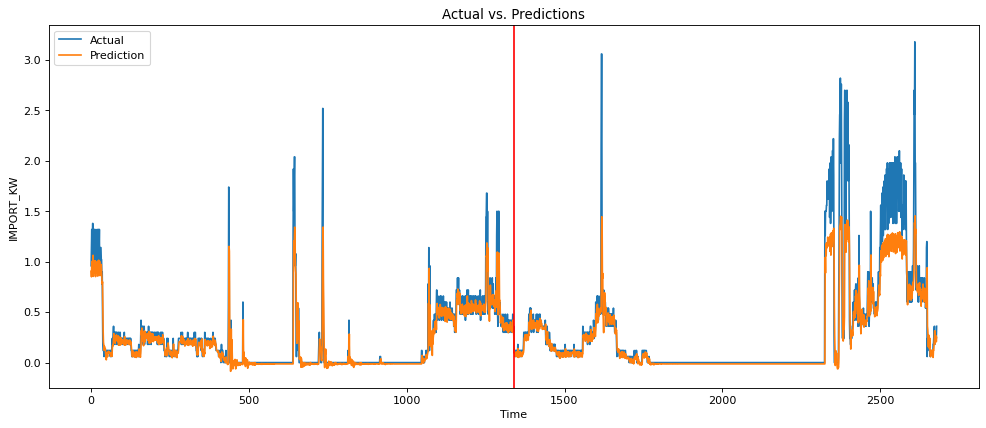

In [ ]:
def plot_result(y_train, y_test, y_pred_model, y_test_pred_model):
    actual = np.append(y_train, y_test)
    predictions = np.append(y_pred_model, y_test_pred_model)
    rows = len(actual)
    plt.figure(figsize=(15,6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(y_train), color='r')
    plt.legend(['Actual', 'Prediction'])
    plt.xlabel('Time')
    plt.ylabel('IMPORT_KW')
    plt.title('Actual vs. Predictions')

plot_result(y_train, y_test, y_pred_model, y_test_pred_model)

In [ ]:
print(rmse_train)
print(rmse_test)

0.17323784830436054
0.22555674496728093


**EXPORT_KW**

In [ ]:
export_kw = df['EXPORT_KW']
train_test_balance_export = len(df)//2
train_export = list(export_kw)[:train_test_balance_export]
test_export = list(export_kw)[train_test_balance_export:]

In [ ]:
windowSize_export_train, X_train_export, y_train_export = 100, [], []
for index in range(len(train_export)-windowSize_export_train):
    X_train_export.append(train_export[index:index+windowSize_export_train])
    y_train_export.append(train_export[index+windowSize_export_train])

In [ ]:
X_train_export, y_train_export = np.array(X_train_export), np.array(y_train_export)
X_train_export = X_train_export.reshape((len(X_train_export), 100,1))

In [ ]:
model = Sequential()
model.add(SimpleRNN(10, input_shape=(100,1)))
model.add(Dense(1, activation='linear'))

In [ ]:
model.compile(loss='mse', optimizer='Adam', metrics=['mae'])
history = model.fit(X_train_export, y_train_export, epochs=5)

Epoch 1/5
42/42 [==============================] - 1s 15ms/step - loss: 1.5098 - mae: 0.7044
Epoch 2/5
42/42 [==============================] - 1s 14ms/step - loss: 0.7979 - mae: 0.4909
Epoch 3/5
42/42 [==============================] - 1s 15ms/step - loss: 0.4741 - mae: 0.3933
Epoch 4/5
42/42 [==============================] - 1s 12ms/step - loss: 0.3302 - mae: 0.3375
Epoch 5/5
42/42 [==============================] - 1s 14ms/step - loss: 0.2584 - mae: 0.2900


In [ ]:
model = Sequential()
model.add(SimpleRNN(64, input_shape=(100,1), return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(16))
model.add(Dense(8, activation='tanh'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='Adam', metrics=['mae'])
history = model.fit(X_train_export, y_train_export, epochs=5)

Epoch 1/5
42/42 [==============================] - 3s 45ms/step - loss: 0.2317 - mae: 0.2800
Epoch 2/5
42/42 [==============================] - 2s 47ms/step - loss: 0.1045 - mae: 0.1661
Epoch 3/5
42/42 [==============================] - 2s 45ms/step - loss: 0.0795 - mae: 0.1477
Epoch 4/5
42/42 [==============================] - 2s 45ms/step - loss: 0.0789 - mae: 0.1481
Epoch 5/5
42/42 [==============================] - 2s 45ms/step - loss: 0.0683 - mae: 0.1328


In [ ]:
y_train_pred_model_export = model.predict(X_train_export)

In [ ]:
rmse_train_export = sqrt(mean_squared_error(y_train_export, y_train_pred_model_export))
print(rmse_train_export)

0.2476784493112133


**Test export**

In [ ]:
windowSize_export_test, X_test_export, y_test_export = 100, [], []
for index in range(len(test)-windowSize_export_test):
    X_test_export.append(test[index:index+windowSize_export_test])
    y_test_export.append(test[index+windowSize_export_test])

In [ ]:
X_test_export, y_test_export = np.array(X_test_export), np.array(y_test_export)
X_test_export = X_test.reshape((len(X_test_export), 100,1))

In [ ]:
y_test_pred_model_export = model.predict(X_test_export)

In [ ]:
rmse_test_export = sqrt(mean_squared_error(y_test_export, y_test_pred_model_export))
print(rmse_test_export)

0.2168457270892978


**Plot Export**

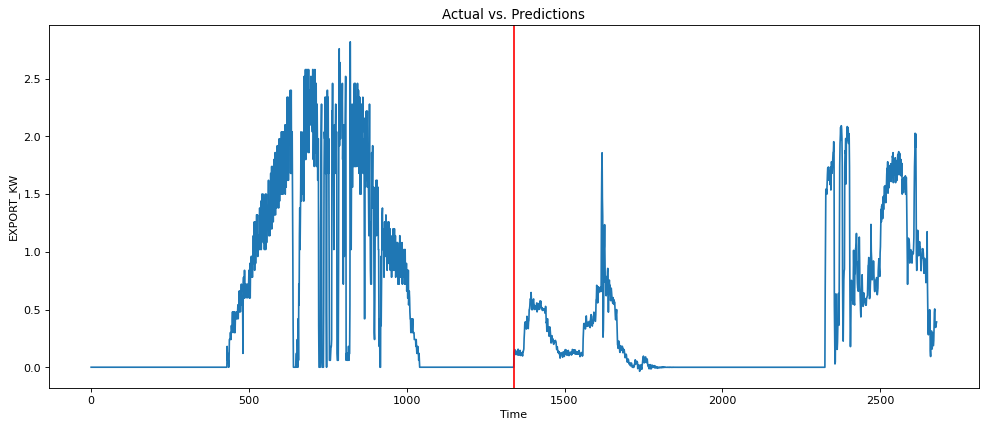

In [ ]:
def plot_result(y_train_export, y_test_export, y_train_pred_model_export, y_test_pred_model_export):
    result = np.append(y_train_export, y_test_pred_model_export)
#     predictions = np.append(y_pred_model, y_test_pred_model)
    rows = len(result)
    plt.figure(figsize=(15,6), dpi=80)
    plt.plot(range(rows), result)
#     plt.plot(range(rows), y_test_pred_model)
    plt.axvline(x=len(y_train_export), color='r')
#     plt.legend(['Actual', 'Prediction'])
    plt.xlabel('Time')
    plt.ylabel('EXPORT_KW')
    plt.title('Actual vs. Predictions')

plot_result(y_train_export, y_test_export, y_train_pred_model_export, y_test_pred_model_export)

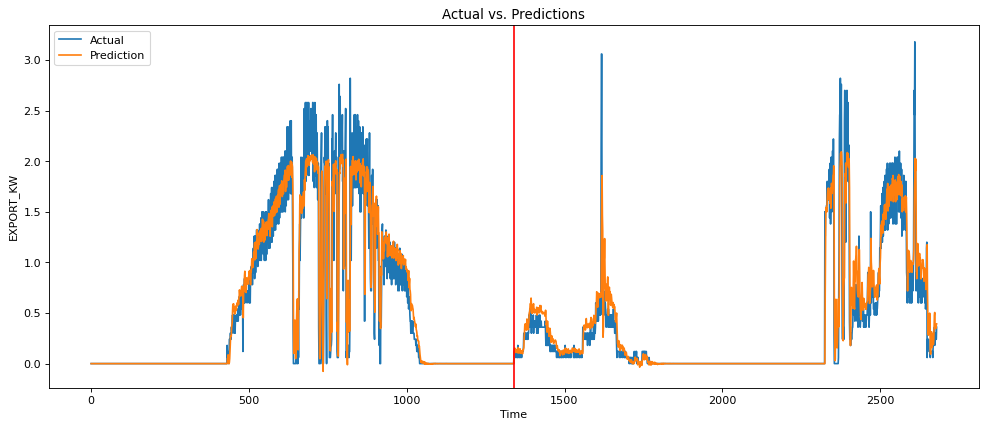

In [ ]:
def plot_result(y_train_export, y_test_export, y_train_pred_model_export, y_test_pred_model_export):
    actual = np.append(y_train_export, y_test_export)
    predictions = np.append(y_train_pred_model_export, y_test_pred_model_export)
    rows = len(actual)
    plt.figure(figsize=(15,6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(y_train), color='r')
    plt.legend(['Actual', 'Prediction'])
    plt.xlabel('Time')
    plt.ylabel('EXPORT_KW')
    plt.title('Actual vs. Predictions')

plot_result(y_train_export, y_test_export, y_train_pred_model_export, y_test_pred_model_export)

In [ ]:
print(rmse_train_export)
print(rmse_test_export)

0.2476784493112133
0.2168457270892978
